<a href="https://colab.research.google.com/github/coderzaman/Machine-Learning/blob/main/ML_Mid_Term_Exam_Question_Aktaruzzaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Email: 21222203031@cse.bubt.edu.bd`
###`Name: Aktaruzzaman`

ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [ ]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

**1. Compute Median and IQR**

**First Sort the dataset:**  [30, 31, 32, 32, 33, 33, 34, 34, 35, 500]

Here, **n (total sample) = 10**

* **Median:**
Since  is even (10), we take the average of the 5th and 6th values.

  * Median = (33+33) / 2 = 33

* **Q1 (First Quartile):**
Lower half of data: [30, 31, 32, 32, 33]

  * The median of this lower half is the middle value: **Q1 = 32**
* **Q3 (Third Quartile):** Upper half of data: [33, 34, 34, 35, 500]
  * The median of this upper half is the middle value: **Q3 = 34**
* **IQR (Interquartile Range):**
    
    
   * IQR = Q3 - Q1
        
        = 34 - 32
        
        = 2
    

**Answer:**

* **Median:** 33
* **IQR:** 2

---

**2. Check for Outliers using IQR Rule**

To check for outliers, we calculate the **Lower Fence** and **Upper Fence**.

* **Formulas:**

    * Lower Fence = Q1 - 1.5 * IQR
    * Upper Fence = Q3 + 1.5 * IQR

* **Calculation:**
    * Lower Fence = 32 - (1.5 * 2) = 32-3 = 29
    * Upper Fence = 34 + (1.5 * 2) = 34 + 3 = 37

* **Conclusion:**
The accepted range is [29, 37].
Since the value 500 is greater than the Upper Fence 37, 500 is an outlier.

---

**3. Why Median + IQR is better than Mean + standard deviation**

For this specific dataset, Median + IQR is a better choice because the dataset contains a massive outlier 500.

The dataset contains an extreme outlier 500, which heavily skews the Mean 79.4 and inflates the Standard Deviation, making them poor representations of typical spending 30-35.

In contrast, the Median = 33 and IQR = 2 are robust statistics, they resist the influence of outliers and accurately reflect the central tendency and spread of the majority of the data.

In [ ]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1

[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]

### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

**1. Compute the Positive Predictive Value (PPV)**

**Given Probabilities:**

* Prevalence, : P(Disease): 1% = 0.01
* Probability of No Disease : 1 - 0.01 = 0.99
* Sensitivity : 90% = 0.90  
* Specificity, : 92% = 0.92

First, we need the False Positive Rate, which is the probability of testing positive when healthy:
  * P(Positive | No Disease) = 1 - Specificity = 1 - 0.92 = 0.08

**Bayes' Theorem Formula for PPV:**
  * P(Disease|Positive) = (P(Positive | Disease) * P(Disease)) / P(Disease)

Where P(Positive)(Total Probability) is:

[P(Positive∣Disease)⋅P(Disease)]+[P(Positive∣No Disease) * P(No Disease)]

**Calculation Steps:**

1. **True Positives (Numerator):** 0.90 * 0.01=0.009


2. **False Positives:** 0.08 * 0.99=0.0792


3. **Total Positives (Denominator):** 0.009 + 0.0792 = 0.0882


4. **Final PPV:** = 0.009 / 0.0882 = 0.102 or 10.2%



Answer: The Positive Predictive Value is 10.2%.

---

### **2. Effect of Prevalence Increasing to 20%**

If the prevalence rises to 20%, the PPV will increase significantly.

**Explanation:**
Bayes' theorem relies heavily on the Base Rate or prevalence. When prevalence is very low (1%), the number of healthy people is huge, so even a small false positive rate creates a flood of false alarms that drown out the few true cases. However, when prevalence rises (to 20%), the pool of actual sick people grows larger. This increases the proportion of True Positives in the equation relative to False Positives, leading to a much higher probability that a positive test result is real.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

**1. Identify the Type of ML Task**

This is a **Binary Classification** task because the target variable `premium_user` has only two possible outcomes (0 or 1).


**2. Preprocessing Steps**

* **Missing Value Imputation:** Check for and handle any missing values in `age` or `daily_clicks` (e.g., using mean,median) to prevent errors during training.
* **One-Hot Encoding:** Convert the categorical `region` column (7 levels) into numerical binary columns so the model can interpret the geographic data.
* **Feature Scaling:** Apply scaling (StandardScaler or MinMax) to `age` and `daily_clicks` to bring them onto a similar scale, which helps algorithms like Logistic Regression converge faster.
* **Train-Test Split:** Divide the dataset into training and testing sets (e.g., 80/20 split) to ensure the model can be evaluated on unseen data.

---

**3. End-to-End ML Pipeline**

I would start the pipeline by loading the raw data and performing **Exploratory Data Analysis (EDA)** to understand distributions and check for outliers in `daily_clicks`. Next, I would apply the preprocessing steps mentioned above: handling missing values, encoding the `region` variable, and scaling the numeric features. Once the data is prepared, I would split it into training and testing sets. I would then select a baseline model, such as **Logistic Regression** or a **Decision Tree**, and train it on the training set. After training, I would use **Cross-Validation** to tune hyperparameters(Increase or Decrease Depth of Decision Tree) and check for overfitting. Finally, I would evaluate the model on the test set using metrics like **Precision, Recall, F1-score, and ROC-AUC**, specifically focusing on Precision if false alarms are costly, or Recall if missing potential premium users is the priority.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [ ]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


### **1. Compact EDA using pandas**

**Missing value summary**

In [ ]:
print(df.isnull().sum())

age             2
region          0
purchases       1
premium_user    0
dtype: int64


**Unique values per column**

In [ ]:
print(df.nunique())

age             5
region          4
purchases       6
premium_user    2
dtype: int64


**Correlation among numeric columns**

In [ ]:
coor = df.corr(numeric_only=True)
print(coor)

                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


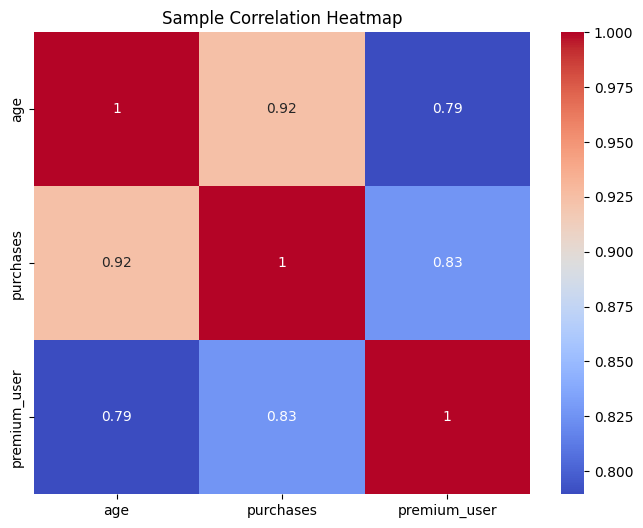

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.heatmap(coor, annot=True, cmap='coolwarm', linewidths=0)

plt.title("Sample Correlation Heatmap")
plt.grid(False)
plt.show()

**Plot:**
**A histogram of `purchases`.**
     


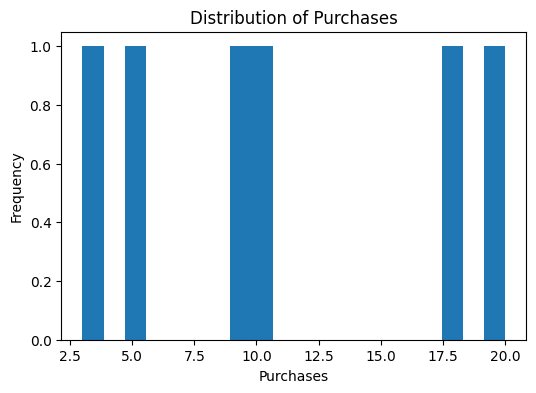

In [ ]:
plt.figure()
plt.hist(df['purchases'], bins=20)
plt.title("Distribution of Purchases")
plt.xlabel("Purchases")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

**A bar chart for `region` frequency.**

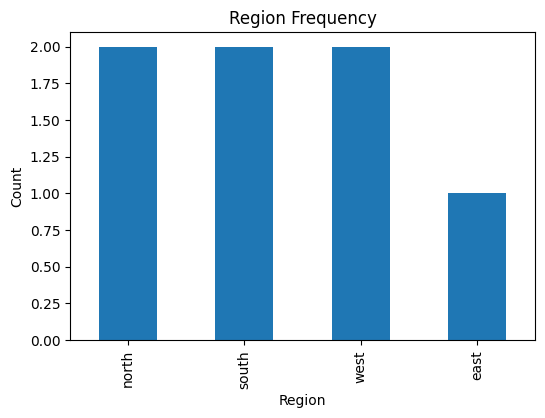

In [ ]:
plt.figure()
df['region'].value_counts().plot(kind='bar')
plt.title("Region Frequency")
plt.xlabel("Region")
plt.ylabel("Count")
plt.grid(False)
plt.show()

### 2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.


**Imputation**

In [ ]:
age_imputer = SimpleImputer(strategy='median')
df['age'] = age_imputer.fit_transform(df[['age']])

In [ ]:
purchase_imputer = SimpleImputer(strategy='mean')
df['purchases'] = purchase_imputer.fit_transform(df[['purchases']])

**One-Hot Encode region**

In [ ]:
print(df.columns)


df = pd.get_dummies(
    df,
    columns=['region'],
    prefix='region',
    drop_first=True,
    dtype=int
)


print(df)

Index(['age', 'region', 'purchases', 'premium_user'], dtype='object')
    age  purchases  premium_user  region_north  region_south  region_west
0  25.0   3.000000             0             1             0            0
1  30.0  10.000000             1             0             1            0
2  30.0   5.000000             0             1             0            0
3  22.0  10.833333             0             0             0            0
4  45.0  20.000000             1             0             0            1
5  52.0  18.000000             1             0             0            1
6  30.0   9.000000             0             0             1            0


**Scale numeric features (RobustScaler)**

In [ ]:
scaler = RobustScaler()
numeric_cols = ['age', 'purchases']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df.head()

,age,purchases,premium_user,region_north,region_south,region_west
0,-0.5,-0.943820,0,1,0,0
1,0.0,0.000000,1,0,1,0
2,0.0,-0.674157,0,1,0,0
3,-0.8,0.112360,0,0,0,0
4,1.5,1.348315,1,0,0,1


### 3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

In [ ]:
# Creating an interaction feature: 'age_x_purchases'
# Rationale: Older users who buy more might be higher value targets.
df['age_x_purchases'] = df['age'] * df['purchases']

In [ ]:
df.head()

,age,purchases,premium_user,region_north,region_south,region_west,age_x_purchases
0,-0.5,-0.943820,0,1,0,0,0.471910
1,0.0,0.000000,1,0,1,0,0.000000
2,0.0,-0.674157,0,1,0,0,-0.000000
3,-0.8,0.112360,0,0,0,0,-0.089888
4,1.5,1.348315,1,0,0,1,2.022472


### 4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.

In [ ]:
print("Final Transformed Dataframe:")
display(df.round(3))

Final Transformed Dataframe:


,age,purchases,premium_user,region_north,region_south,region_west,age_x_purchases
0,-0.5,-0.944,0,1,0,0,0.472
1,0.0,0.000,1,0,1,0,0.000
2,0.0,-0.674,0,1,0,0,-0.000
3,-0.8,0.112,0,0,0,0,-0.090
4,1.5,1.348,1,0,0,1,2.022
5,2.2,1.079,1,0,0,1,2.373
6,0.0,-0.135,0,0,1,0,-0.000


**Expected Output Explanation:**

* Missing Values: Filled (Age with Medain, Purchases with mean).

* Encoding: region column is replaced by region_east, region_north, etc.

* Scaling: age, purchases, and the new feature are scaled to small values (centered around median) using RobustScaler to handle any outliers.

* New Feature: age_x_purchases exists.



---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [ ]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


### **Step 2: Split Data into Train and Test**

In [ ]:
X = df2[['area_sqft', 'bedrooms']]
y = df2['price']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Step 3: Fit Linear Regression Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Step 4: Model Parameters and Prediction**

In [ ]:
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")

# Predict on test set
y_pred = model.predict(X_test)
print(f"Predictions: {y_pred}")

Intercept: -33.85
Coefficients: [0.15384615 5.38461538]
Predictions: [100.         130.76923077]


### **Step 5: Compute Evaluation Metrics**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 19.62
RMSE: 19.62
R²: -0.71


### **Step 6: Residual Plot**

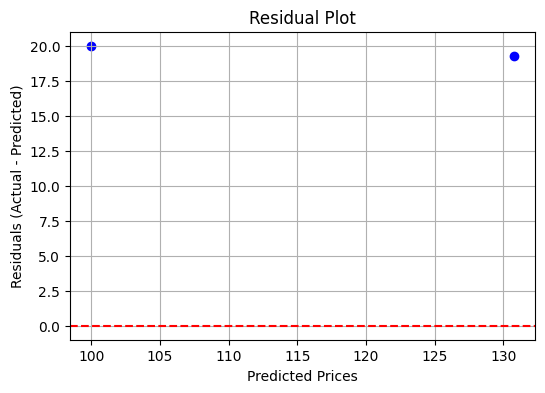

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

**Observation:** The residuals are all positive, meaning the model is consistently under-predicting the prices for these test cases (Predicted < Actual). The errors are around 20 units, indicating a systematic bias for this specific test set.

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


###**Part 1: Threshold based classification and metrics**

In [ ]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below
def evaluate_threshold(threshold):
    # Convert probabilities to 0 or 1 based on threshold
    y_pred = (y_prob >= threshold).astype(int)

    print(f"--- Threshold: {threshold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.3f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.3f}\n")

# Run for both thresholds
evaluate_threshold(0.5)
evaluate_threshold(0.3)

--- Threshold: 0.5 ---
Confusion Matrix:
 [[5 0]
 [0 5]]
Precision: 1.000
Recall:    1.000
F1 Score:  1.000

--- Threshold: 0.3 ---
Confusion Matrix:
 [[3 2]
 [0 5]]
Precision: 0.714
Recall:    1.000
F1 Score:  0.833



Lowering the threshold from 0.5 to 0.3 caused Precision to decrease (from 1.0 to 0.714) while Recall remained perfect (1.0).

This happens because a lower threshold makes the model more eager to predict Positive 1, accepting weaker probabilities like 0.3 or 0.4 as Positive. As a result, while we still catch all the actual positives maintaining high Recall, we also incorrectly label some negative instances as positive (increasing False Positives), which dilutes the Precision.

### **Part 2: ROC and AUC (6 marks)**

AUC Score: 1.000


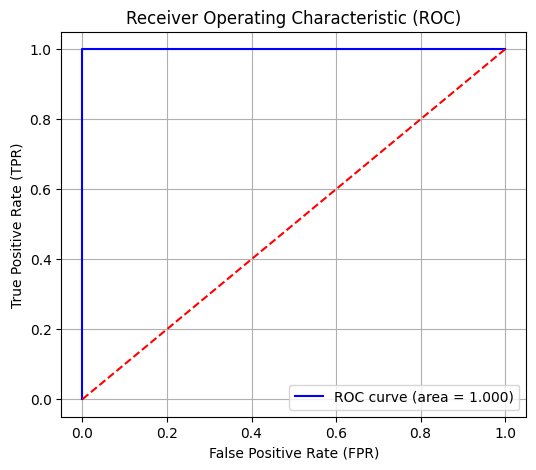

In [ ]:
# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.3f}")

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

An AUC of 1.0 means the model perfectly distinguishes between positive and negative classes, while a low AUC (near 0.5) implies the model is no better than random guessing.

### **Part 3: Decision Tree on a small dataset (6 marks)**

In [ ]:
# 1. Create the dataset
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

In [ ]:
# 2. Fit DecisionTreeClassifier (max_depth=2)
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(df3[['hours']], df3['passed'])

DecisionTreeClassifier(max_depth=2, random_state=42)

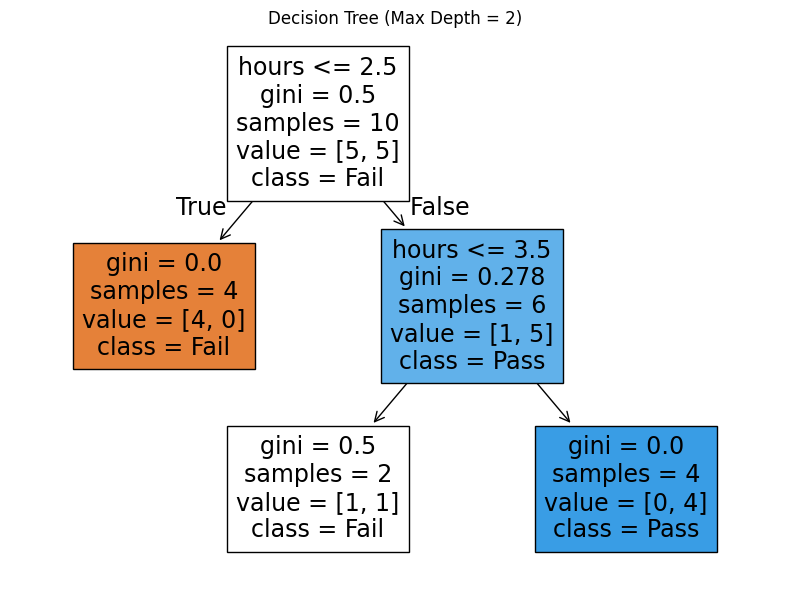

In [ ]:
# 3. Plot the tree
plt.figure(figsize=(8, 6))
plot_tree(clf, feature_names=['hours'], class_names=['Fail', 'Pass'], filled=True)
plt.title("Decision Tree (Max Depth = 2)")
plt.tight_layout()
plt.show()

The tree likely generalizes well and does not overfit because the restricted depth max_depth=2 forces it to capture the main trend (more study hours leads to passing) rather than memorizing the specific noise or contradictions in the middle range (3 hours). It prioritizes simple, interpretable rules over perfect accuracy on the training data.